In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\VICTUS\Downloads\train.csv\train.csv')

In [3]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
## finding %age of null values in columns having null values

null = pd.DataFrame({'Null Values' : df.isnull().sum().sort_values(ascending=False),
                     'Percentage of Null Values' : 
                     (round(((df.isnull().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)),2)).astype(str)+"%"})
null[null['Null Values'] > 0]

,Null Values,Percentage of Null Values
Product_Category_3,383247,69.67%
Product_Category_2,173638,31.57%


In [8]:
## dropping Product_Category_3 as it has so many null values

df = df.drop("Product_Category_3", axis = 1)
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200


In [9]:
## classifying mode values in Product Category 2 on the basis of age

mode = df.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)

## replacing null values in Product_Category_2 with 
## the mode value of most bought elements in its group as per age group

for age in df["Age"].unique():
    age_mode = df.loc[df['Age'] == age ,'Product_Category_2'].fillna(mode[age])
    df.loc[df['Age']== age,'Product_Category_2'] = age_mode

## checking no. of null values now
df['Product_Category_2'].isnull().sum()

0

In [10]:
## Mode values are all integer types
## Converting data type of Product_Cartegory_2 to integer

df['Product_Category_2'] = df['Product_Category_2'].astype(int)

In [11]:
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64


In [12]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.228379,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.318496,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000


In [13]:
## checking for duplicates
print('No. of duplicates in the dataset:',df.duplicated().sum())

No. of duplicates in the dataset: 0


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1228\2998725224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Purchase)
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


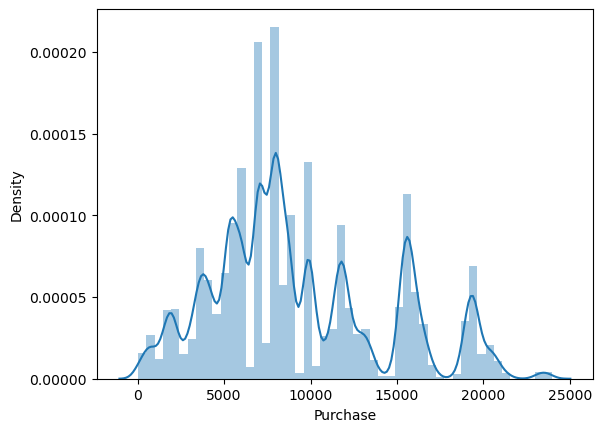

In [14]:
sns.distplot(df.Purchase)
plt.show()

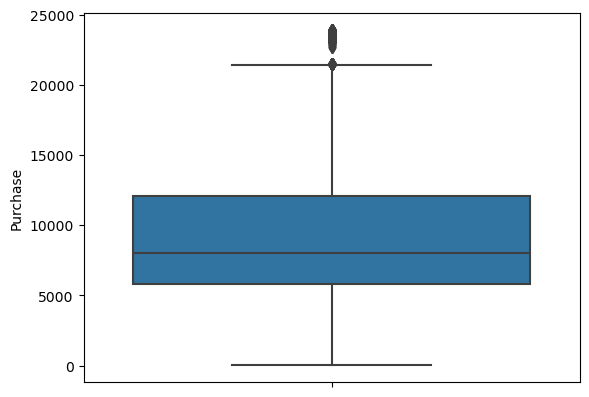

In [15]:
sns.boxplot(data = df, y = "Purchase")
plt.show()

Total no. of Customers who purchased on Black Friday: 5891
Total no. of unique products that were sold on Black Friday: 3631


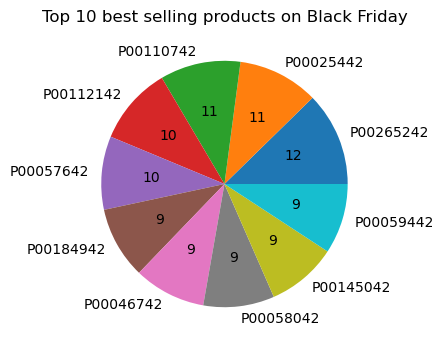

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
dtype: int64

In [16]:

print("Total no. of Customers who purchased on Black Friday:",df.User_ID.nunique())

## column (Product_ID)

print("Total no. of unique products that were sold on Black Friday:",df.Product_ID.nunique())
plt.figure(figsize=(10,4))
df.groupby("Product_ID").size().sort_values(ascending = False).head(10).plot(kind = "pie", autopct = "%.0f", title = "Top 10 best selling products on Black Friday")
plt.show()
df.groupby("Product_ID").size().sort_values(ascending = False).head(3)

In [17]:
####5891 users purchased on Black Friday sales.
####3623 unique products were sold on Black Friday.
####The top 3 best selling products (sold/unit) are: P00265242, P00110742, and P00025442.

<Figure size 640x480 with 0 Axes>

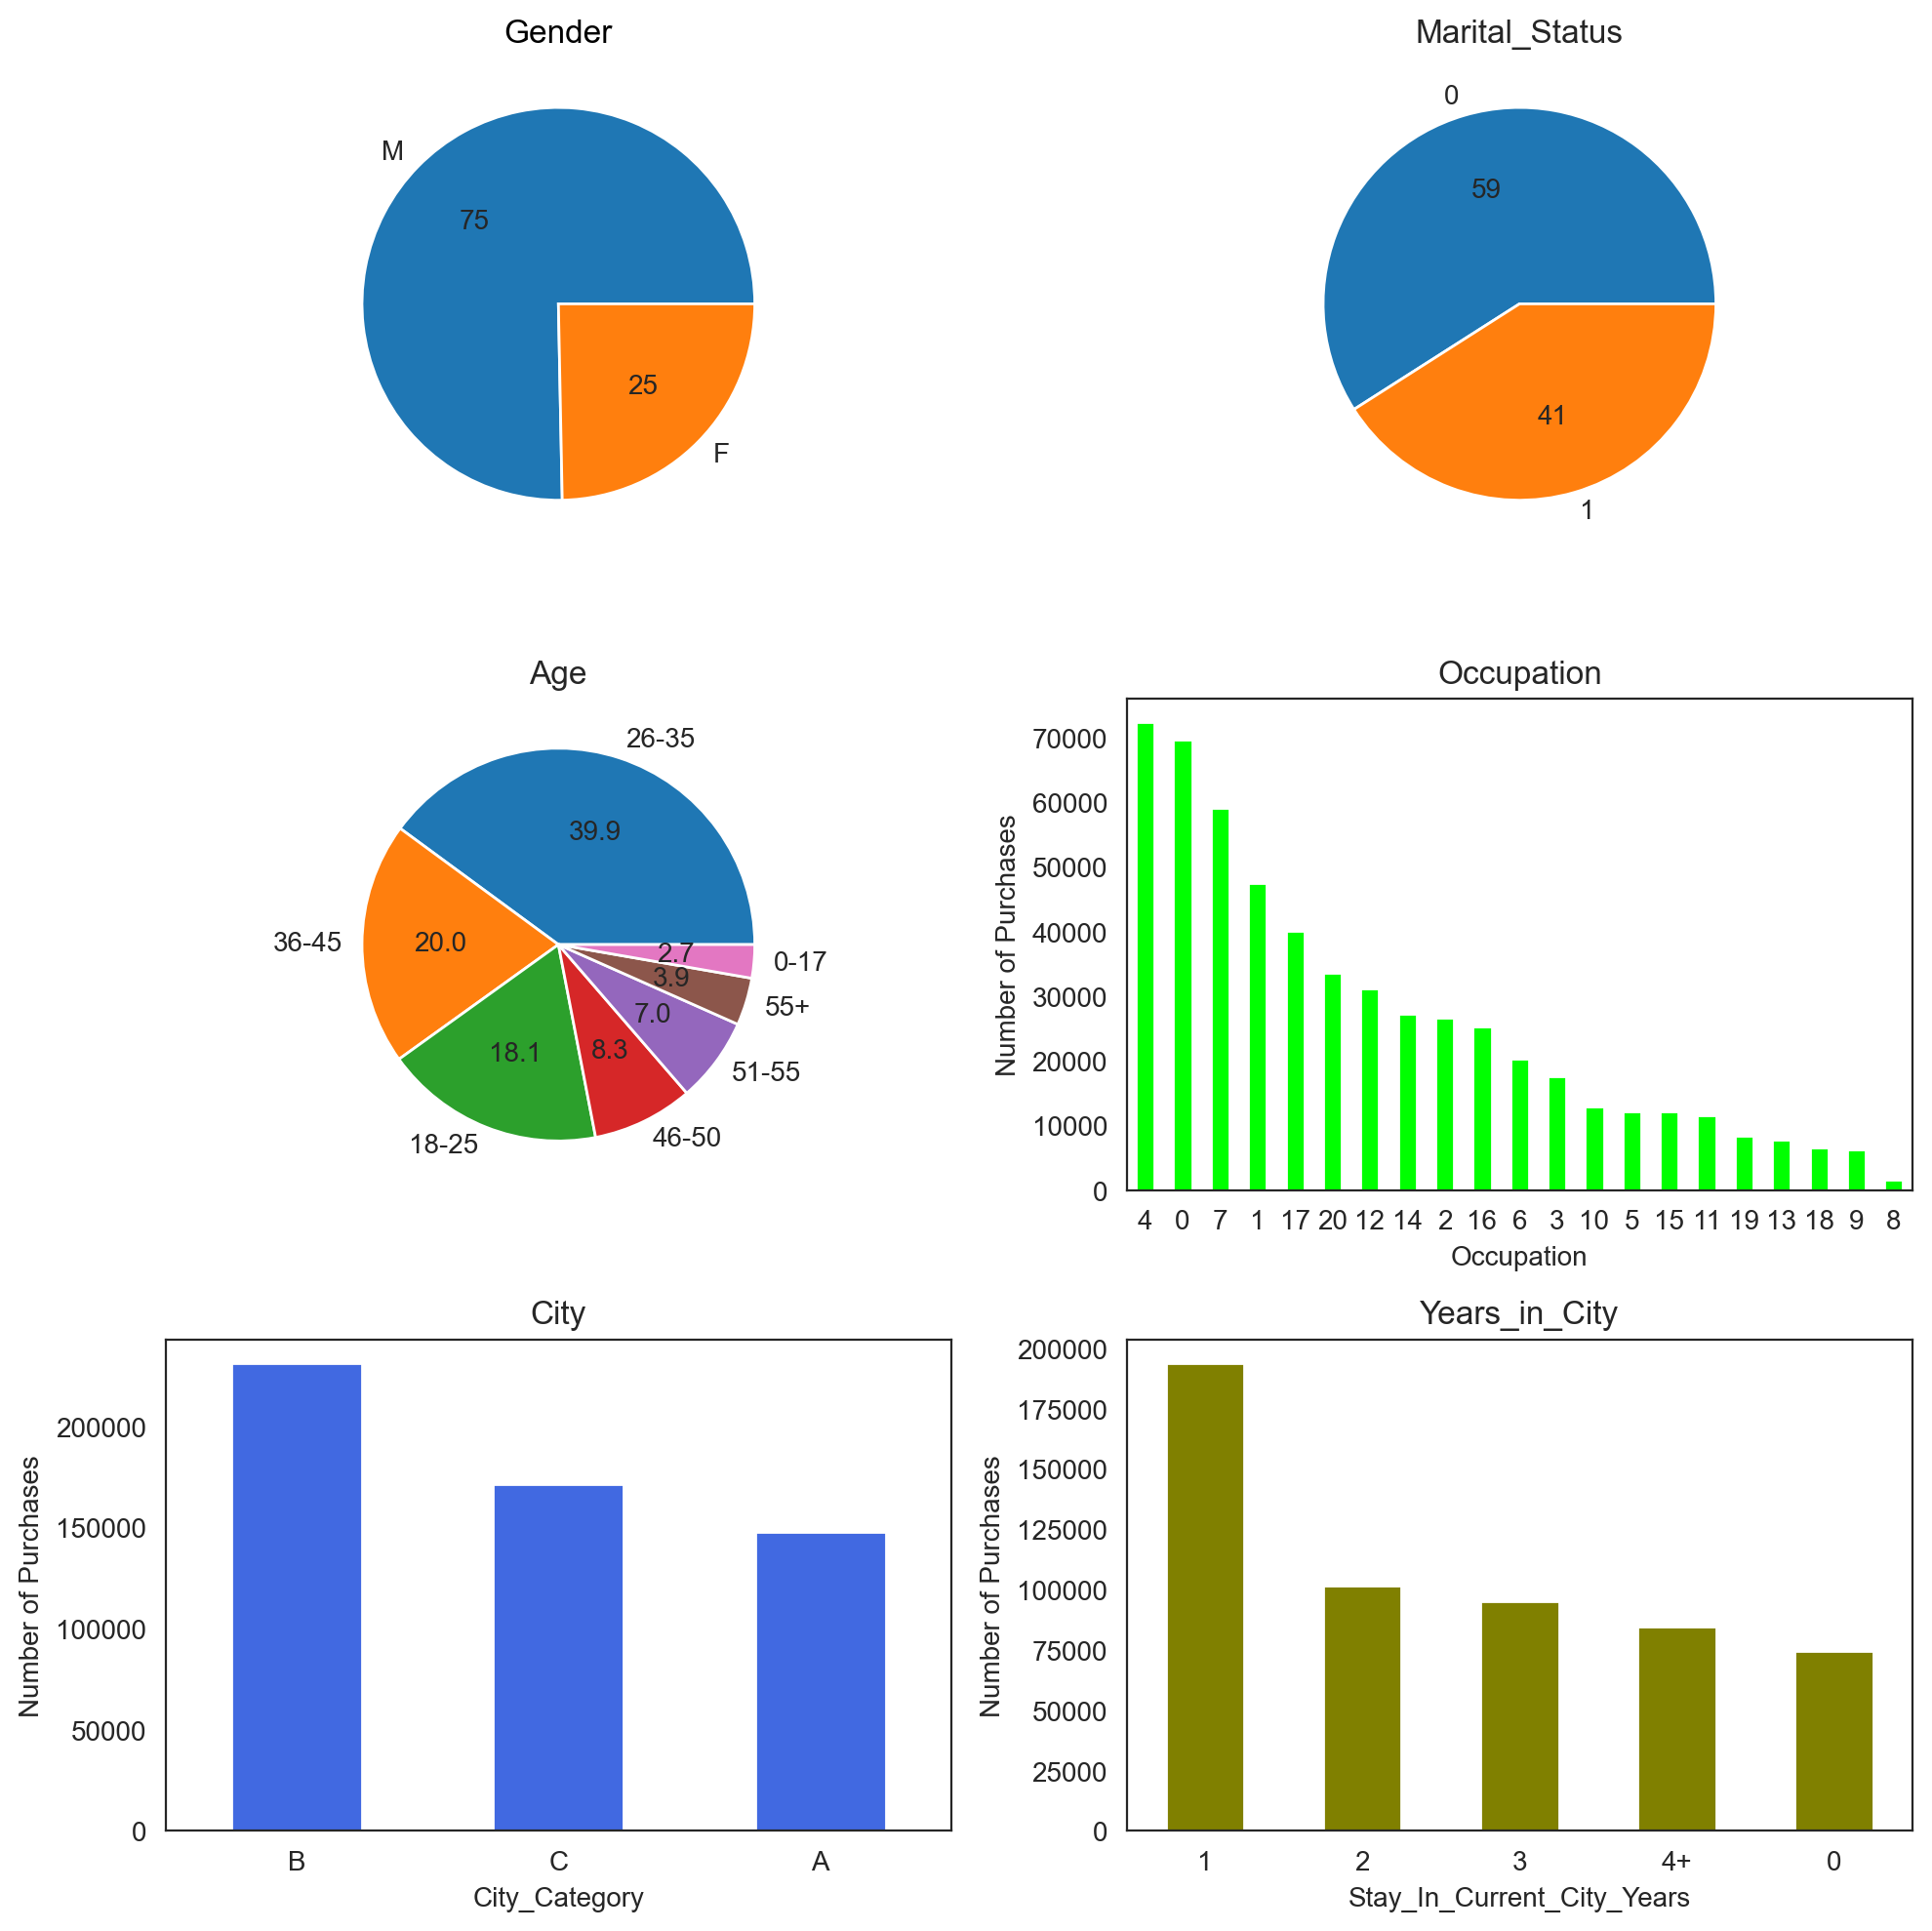

In [18]:
plt.figure(1)
plt.figure(figsize=(10,10), dpi = 200)

# Column (Gender)
plt.subplot(321)
sns.set_style(style = 'dark')
df['Gender'].value_counts().plot(kind='pie', autopct = '%.0f',label = "")
plt.title('Gender')

# Column (Marital_Status)
plt.subplot(322)
sns.set_style(style = 'white')
df['Marital_Status'].value_counts().plot(kind='pie', autopct = '%.0f',label = "")
plt.title('Marital_Status')

# Column (Age)
plt.subplot(323)
df['Age'].value_counts().plot(kind='pie', autopct = '%.1f', label = "")
plt.title('Age')

# Column (Occupation)
plt.subplot(324)
df['Occupation'].value_counts().plot(kind='bar',color='lime',rot=0)
plt.title('Occupation')
plt.ylabel("Number of Purchases")

# Column (City)
plt.subplot(325)
df['City_Category'].value_counts().plot(kind='bar',color='royalblue',rot=0)
plt.title('City')
plt.ylabel("Number of Purchases")

# Column (Years_in_City)
plt.subplot(326)
df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar',color='olive',rot=0)
plt.title('Years_in_City')
plt.ylabel("Number of Purchases")

plt.tight_layout()
plt.show()

1.The Male : Female ratio of customers (on basis of no. of units sold/ purchased) on Black Friday is 75:25 or 3:1.2.
Out of the total no. of items sold, about 59% of it were sold to customers who were single/ unmarried while 41% were married.3.
Age group of 26-35 purchased the most number of items on Black Friday4..
People who falls in the Occupation Category '4' purchased the most number of item5.s.
People in City B purchased the most number of items on Black Frid6.ay.
People staying in the same city for 1 year purchased the most number of items on Black Friday.